In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [3]:
test = pd.read_pickle('data/SS3_c57_UMIs_concat_vs_SS3_cast_UMIs_concat_TEST.pkl')
gene_annotation = pd.read_csv('data/mouse_gene_annotation.csv', index_col=0)
test.drop(gene_annotation['name2'][gene_annotation.chrom == 'chrX'].index.values, errors='ignore', inplace=True)

bf_p = test[2]
bs_p = test[3]

bf_c57 = pd.Series([gene[0] for gene in test[0]], index=test.index)
bf_cast = pd.Series([gene[0] for gene in test[1]], index=test.index)
bs_c57 = pd.Series([gene[2]/gene[1] for gene in test[0]], index=test.index)
bs_cast = pd.Series([gene[2]/gene[1] for gene in test[1]], index=test.index)

bf_p = bf_p.dropna()
bs_p = bs_p.dropna()

bf_p_fdr = multipletests(bf_p, alpha=0.05, method='fdr_bh')
bs_p_fdr = multipletests(bs_p, alpha=0.05, method='fdr_bh')
print(np.sum(bf_p_fdr[0]))
print(np.sum(bs_p_fdr[0]))
bf_fdr_series = pd.Series(bf_p_fdr[0], index=bf_p.index)
bs_fdr_series = pd.Series(bs_p_fdr[0], index=bs_p.index)
bf_sig_names = bf_fdr_series.index.values[bf_fdr_series]
bs_sig_names = bs_fdr_series.index.values[bs_fdr_series]

307
276


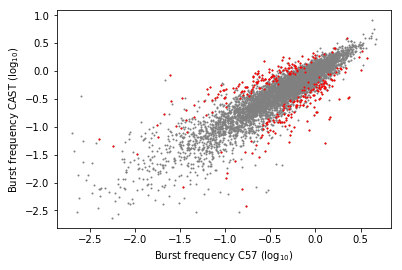

In [4]:
plt.scatter(np.log10(bf_c57), np.log10(bf_cast), s = 1, color='Grey')
plt.scatter(np.log10(bf_c57[bf_sig_names]), np.log10(bf_cast[bf_sig_names]), s = 1, color='Red')
plt.xlabel('Burst frequency C57 (log$_{10}$)')
plt.ylabel('Burst frequency CAST (log$_{10}$)')
plt.savefig('figures/Fig4a.pdf')
plt.show()

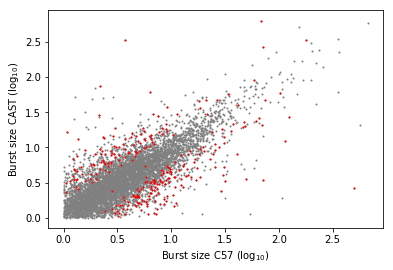

In [5]:
plt.scatter(np.log10(bs_c57), np.log10(bs_cast), s = 1, color='Grey')
plt.scatter(np.log10(bs_c57[bs_sig_names]), np.log10(bs_cast[bs_sig_names]), s = 1, color='Red')
plt.xlabel('Burst size C57 (log$_{10}$)')
plt.ylabel('Burst size CAST (log$_{10}$)')
plt.savefig('figures/Fig4b.pdf')
plt.show()

In [6]:
def read_variation_bed(file):
    bed_file = pd.read_csv(file, delimiter="\t", header = None, index_col=3)
    return bed_file

In [7]:
SNPs = read_variation_bed('data/every_snp_enhancers_per.bed')
SNPs['name'] = SNPs.index.values

In [8]:
log_diff_bf = pd.Series(np.absolute(np.log(bf_c57/bf_cast)), index=bf_c57.index).sort_values()
log_diff_bs = pd.Series(np.absolute(np.log(bs_c57/bs_cast)), index=bs_c57.index).sort_values()

sig_bf_fc = log_diff_bf[bf_sig_names].sort_values()
sig_bs_fc = log_diff_bs[bs_sig_names].sort_values()
Y=SNPs.loc[bf_p.sort_values().index].dropna().groupby('name').size()[bf_p.sort_values().index].dropna()

/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


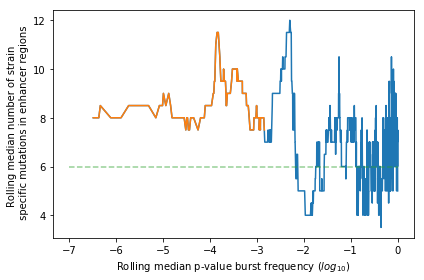

In [9]:
plt.plot(np.log10(bf_p.sort_values()[Y[bf_p.sort_values().index].dropna().index].rolling(50).median().dropna()), np.array(Y[bf_p.sort_values().index].dropna().rolling(50).median().dropna()))
plt.plot(np.log10(bf_p.sort_values()[Y[bf_p[sig_bf_fc.index].sort_values().index].dropna().index].rolling(50).median().dropna()), np.array(Y[bf_p[sig_bf_fc.index].sort_values().index].dropna().rolling(50).median().dropna()))
plt.plot([-7,0],[6,6], '--', alpha=0.5)
plt.xlabel('Rolling median p-value burst frequency ($log_{10}$)')
plt.ylabel('Rolling median number of strain \n specific mutations in enhancer regions')
plt.tight_layout()
plt.savefig('figures/Fig4c.pdf')
plt.show()

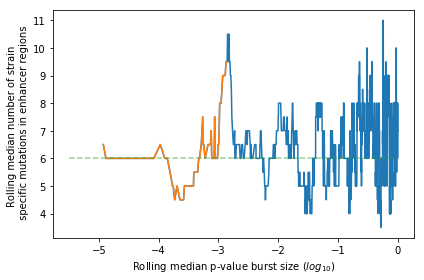

In [10]:
plt.plot(np.log10(bs_p.sort_values()[Y[bs_p.sort_values().index].dropna().index].rolling(50).median().dropna()), np.array(Y[bs_p.sort_values().index].dropna().rolling(50).median().dropna()))
plt.plot(np.log10(bs_p.sort_values()[Y[bs_p[sig_bs_fc.index].sort_values().index].dropna().index].rolling(50).median().dropna()), np.array(Y[bs_p[sig_bs_fc.index].sort_values().index].dropna().rolling(50).median().dropna()))
plt.plot([-5.5,0],[6,6], '--', alpha=0.5)
plt.xlabel('Rolling median p-value burst size ($log_{10}$)')
plt.ylabel('Rolling median number of strain \n specific mutations in enhancer regions')
plt.tight_layout()
plt.savefig('figures/ExtDataFig5g.pdf')
plt.show()

In [11]:
bf_cast_example = ['Sept8', 'Scp2', 'Car13']
bf_c57_example = ['Ccbe1', 'Arhgef5', 'Srf']
bs_c57_example = ['Phgdh','Snx7', 'Zyx']
bs_cast_example = ['Cdc42se1', 'Ndrg1', 'Ctsf']

In [12]:
c57_UMI = pd.read_csv('data/SS3_c57_UMIs_concat.csv', index_col=0)
cast_UMI = pd.read_csv('data/SS3_cast_UMIs_concat.csv', index_col=0)

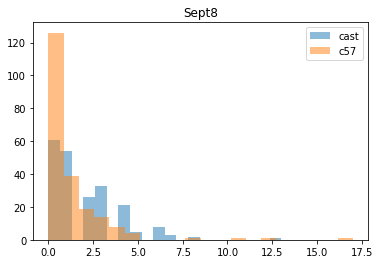

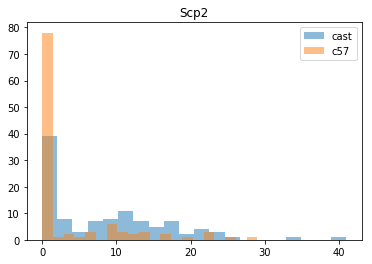

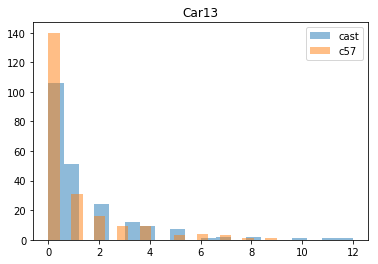

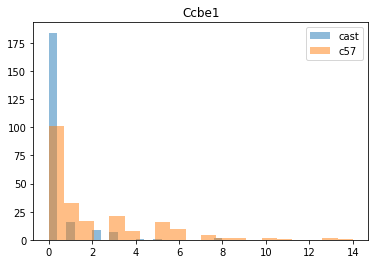

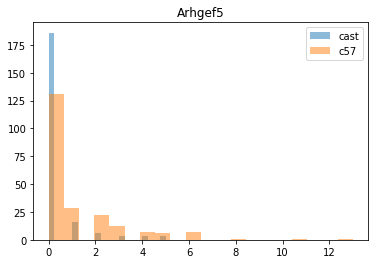

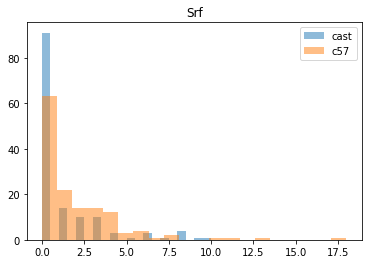

In [13]:
for gen in bf_cast_example:
    name = gen
    plt.title(name)
    plt.hist(cast_UMI.loc[name][pd.notnull(cast_UMI.loc[name])], bins = 20, label='cast', alpha=0.5)
    plt.hist(c57_UMI.loc[name][pd.notnull(c57_UMI.loc[name])], bins = 20, label='c57', alpha=0.5)
    plt.legend()
    plt.savefig('figures/ExtDataFig8a_{}_bf_upin_cast.pdf'.format(gen))
    plt.show()
for gen in bf_c57_example:
    name = gen
    plt.title(name)
    plt.hist(cast_UMI.loc[name][pd.notnull(cast_UMI.loc[name])], bins = 20, label='cast', alpha=0.5)
    plt.hist(c57_UMI.loc[name][pd.notnull(c57_UMI.loc[name])], bins = 20, label='c57', alpha=0.5)
    plt.legend()
    plt.savefig('figures/ExtDataFig8b_{}_bf_upin_c57.pdf'.format(gen))
    plt.show()


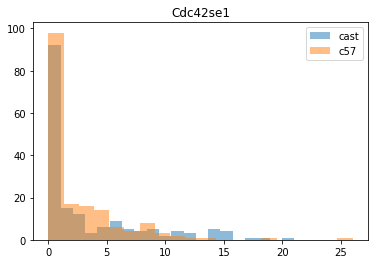

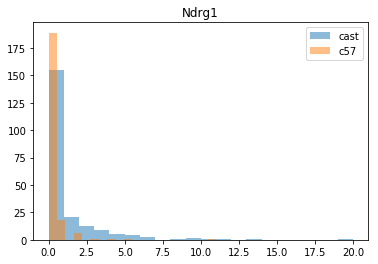

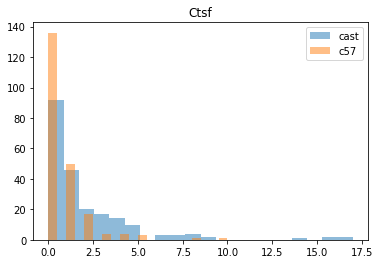

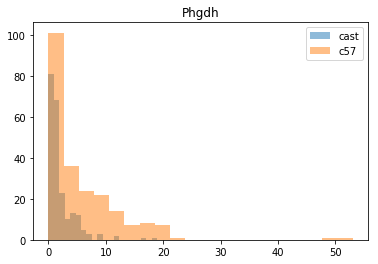

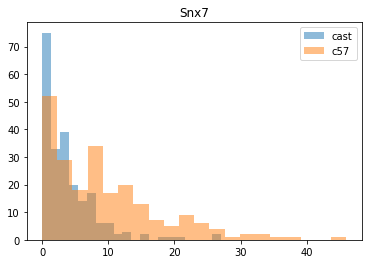

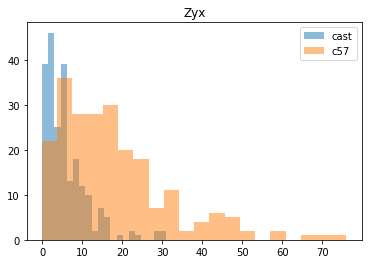

In [14]:
for gen in bs_cast_example:
    name = gen
    plt.title(name)
    plt.hist(cast_UMI.loc[name][pd.notnull(cast_UMI.loc[name])], bins = 20, label='cast', alpha=0.5)
    plt.hist(c57_UMI.loc[name][pd.notnull(c57_UMI.loc[name])], bins = 20, label='c57', alpha=0.5)
    plt.legend()
    plt.savefig('figures/ExtDataFig8c_{}_bs_upin_cast.pdf'.format(gen))
    plt.show()
for gen in bs_c57_example:
    name = gen
    plt.title(name)
    plt.hist(cast_UMI.loc[name][pd.notnull(cast_UMI.loc[name])], bins = 20, label='cast', alpha=0.5)
    plt.hist(c57_UMI.loc[name][pd.notnull(c57_UMI.loc[name])], bins = 20, label='c57', alpha=0.5)
    plt.legend()
    plt.savefig('figures/ExtDataFig8d_{}_bs_upin_c57.pdf'.format(gen))
    plt.show()